# **The Spark Foundation #GRIPMAR2021**
---
Name - ZEENAT ANSARI.

Task - Predictions using Supervised ML

Predict the score of a student who studied for a given hour.


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## reading the data from remote link

In [ ]:
students_studyhrs=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
students_studyhrs


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Observing the data we can see that provided data is about number of study hours and score of an Individual student

Now ,Checking the shape of the data





In [ ]:
students_studyhrs.shape

(25, 2)

# Plot the graph



As our objective is to predict the score of a student who studied for a given hours so we need to plot the graph Hours vs Scores


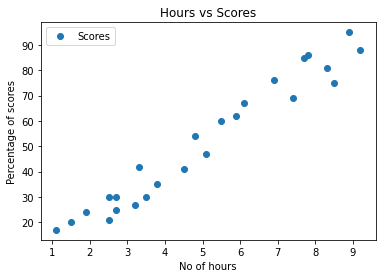

In [ ]:
students_studyhrs.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('No of hours')  
plt.ylabel('Percentage of scores')  
plt.show()


observing the plot we can clearly see there is positive (linear) correlation between hours of study and percentage of scores hence linear regression will be good to fit to the given data.



# Preparing the data

Divide the data into 'attributes' and 'lables'.

In [ ]:
X = students_studyhrs.iloc[:, :-1].values  
y = students_studyhrs.iloc[:, 1].values

Split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0) 

### Fitting the model

This statement creates the variable model as the instance of LinearRegression



In [ ]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()


With .fit(), you calculate the optimal values of the , using the existing input and output (x and y) as the arguments.

In [ ]:
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In this case, we multiply each element of x with model.coef and add model.intercept to the product.



In [ ]:
line = model.coef_*X+model.intercept_
print('predicted response:', line, sep='')


predicted response:[[26.73351648]
 [51.92914068]
 [33.51695377]
 [84.87726463]
 [36.42414117]
 [17.04289179]
 [91.66070191]
 [55.80539056]
 [82.93913969]
 [28.67164142]
 [77.12476487]
 [59.68164043]
 [46.11476586]
 [34.48601624]
 [13.16664192]
 [88.7535145 ]
 [26.73351648]
 [20.91914167]
 [61.61976537]
 [74.21757747]
 [28.67164142]
 [49.02195327]
 [39.33132858]
 [69.37226512]
 [78.09382734]]


Plotting the regression line and for the test data

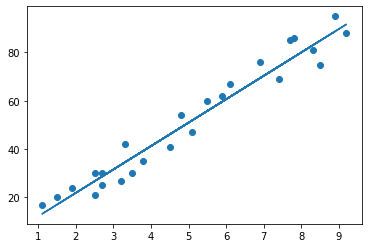

In [ ]:
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Visualizing the training set data

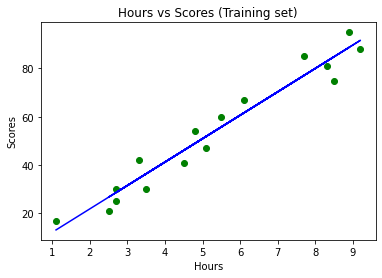

In [ ]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Hours vs Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Making predictions

Predicting the test results

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

Compare the predictions with the original data i.e. Actual vs predicted



In [ ]:
Students_studyhrs1=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
Students_studyhrs1

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [ ]:
prediction=model.predict([[9.25]])
print("No of Hours = {}".format(9.25)) 
print("Predicted Score = {}".format(prediction[0]))


No of Hours = 9.25
Predicted Score = 92.14523314523316


The predicted percentage score of the student who studies for 9.25 hours is 92.145 i.e If student studies for 9.25 hours then according to this algorithm he/should score 92.14%.


# Evaluating the model


The final step is to evaluate the performance of algorithm as we all know that there is always error and we need to check the error assoiciated with this algorithm for that we took metrics.mean_absolute_error from sklearn import metrics

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.691397441397446
